**Investigating the Adoption of Research Software**

***Survey***

In [1]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx to Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx


In [2]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx'

In [3]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s



In [4]:
df = pd.read_excel(file_name)

df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,UTILIZACAO_D01F01,UTILIZACAO_D01F02,UTILIZACAO_D01F03,...,QUALIDADE_D02F07,QUALIDADE_D02F08,NAO_ADOCAO_D03F01,NAO_ADOCAO_D03F02,NAO_ADOCAO_D03F03,NAO_ADOCAO_D03F04,NAO_ADOCAO_D03F05,NAO_ADOCAO_D03F06,NAO_ADOCAO_D03F07,NAO_ADOCAO_D03F08
0,1,3,3,2,1,4,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,1,4,4,1,2,4,2,4,2,3,...,2,2,4,5,2,4,2,3,4,3
2,1,3,4,2,2,2,2,2,5,4,...,5,5,4,5,2,3,4,4,5,4
3,1,2,3,3,1,4,2,4,3,4,...,4,4,5,4,5,5,3,3,5,3
4,1,1,5,3,1,4,2,5,3,5,...,4,5,5,5,3,4,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,4,4,2,2,4,3,4,3,4,...,4,4,5,5,4,4,3,0,4,4
169,2,2,3,2,2,4,2,4,3,5,...,2,4,5,5,4,4,2,3,2,4
170,2,1,3,1,2,2,2,3,2,4,...,4,5,4,5,3,4,3,2,4,4
171,2,4,3,2,2,5,3,4,4,5,...,4,5,5,5,5,5,1,2,5,5


In [5]:
# Selecting columns
df1 = df.loc[:, lambda df:['QUALIDADE_D02F01', 'QUALIDADE_D02F02', 'QUALIDADE_D02F03', 'QUALIDADE_D02F04', 'QUALIDADE_D02F05', 'QUALIDADE_D02F06', 'QUALIDADE_D02F07', 'QUALIDADE_D02F08' ]]
df1.columns = ['D02F01', 'D02F02','D02F03', 'D02F04', 'D02F05', 'D02F06', 'D02F07', 'D02F08']
df1

,D02F01,D02F02,D02F03,D02F04,D02F05,D02F06,D02F07,D02F08
0,5,5,5,5,5,5,5,5
1,4,3,2,4,4,4,2,2
2,4,4,4,3,4,4,5,5
3,4,4,4,4,4,4,4,4
4,4,5,5,5,4,5,4,5
...,...,...,...,...,...,...,...,...
168,4,5,5,4,4,4,4,4
169,4,5,5,4,4,3,2,4
170,0,0,4,3,4,5,4,5
171,3,5,5,5,5,5,4,5


In [6]:
df1.style.format("{:.2}").set_properties(**{'text-align': 'center'}).set_table_styles([
    dict(selector="th", props=[("text-align", "center")]),]).hide_index()


<ipython-input-6-1f36c6b33afc>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  dict(selector="th", props=[("text-align", "center")]),]).hide_index()


ValueError: ignored

In [7]:
print("\n\033[1mReport Investigating Research Software (Survey) \033[0m")
print("\nTotal of respondents = ", len(df1))



Report Investigating Research Software (Survey) 

Total of respondents =  173


D02F01 = Have functional suitability

D02F02 = Have performance

D02F03 = Have compatibility

D02F04 = Have usability

D02F05 = Have reliability

D02F06 = Have security

D02F07 = Have maintainability

D02F08 = Have portability

In [9]:
df1.describe().style.format("{:.4}")

,D02F01,D02F02,D02F03,D02F04,D02F05,D02F06,D02F07,D02F08
count,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0
mean,4.197,4.26,4.081,4.145,4.376,4.22,3.688,3.688
std,1.055,0.8116,0.905,0.9566,0.7798,0.9513,1.092,1.237
min,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
50%,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0
75%,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [10]:
df2 = df1.loc[df1['D02F01'] == 5.0]

df2['Percentual'] = (((len(df2['D02F01']))/173) *100)

df2

<ipython-input-10-8c9376045426>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Percentual'] = (((len(df2['D02F01']))/173) *100)


,D02F01,D02F02,D02F03,D02F04,D02F05,D02F06,D02F07,D02F08,Percentual
0,5,5,5,5,5,5,5,5,43.930636
5,5,5,3,0,0,3,2,0,43.930636
9,5,4,3,5,5,3,3,3,43.930636
10,5,4,5,4,4,4,4,4,43.930636
11,5,5,5,5,5,5,4,5,43.930636
...,...,...,...,...,...,...,...,...,...
163,5,5,5,5,5,5,5,5,43.930636
164,5,4,4,5,5,4,3,3,43.930636
165,5,5,5,5,5,5,5,5,43.930636
166,5,4,5,5,4,5,3,3,43.930636


In [11]:
df3_grafico = pd.DataFrame({'D02F01 (%)':[(len(df1.loc[df1['D02F01'] == 5.0])/173) *100, (len(df1.loc[df1['D02F01'] == 4.0])/173) *100, (len(df1.loc[df1['D02F01'] == 3.0])/173) *100, (len(df1.loc[df1['D02F01'] == 2.0])/173) *100, (len(df1.loc[df1['D02F01'] == 1.0])/173) *100, (len(df1.loc[df1['D02F01'] == 0.0])/173) *100],
                   'D02F02 (%)':[(len(df1.loc[df1['D02F02'] == 5.0])/173) *100, (len(df1.loc[df1['D02F02'] == 4.0])/173) *100, (len(df1.loc[df1['D02F02'] == 3.0])/173) *100, (len(df1.loc[df1['D02F02'] == 2.0])/173) *100, (len(df1.loc[df1['D02F02'] == 1.0])/173) *100, (len(df1.loc[df1['D02F02'] == 0.0])/173) *100],
                   'D02F03 (%)':[(len(df1.loc[df1['D02F03'] == 5.0])/173) *100, (len(df1.loc[df1['D02F03'] == 4.0])/173) *100, (len(df1.loc[df1['D02F03'] == 3.0])/173) *100, (len(df1.loc[df1['D02F03'] == 2.0])/173) *100, (len(df1.loc[df1['D02F03'] == 1.0])/173) *100, (len(df1.loc[df1['D02F03'] == 0.0])/173) *100],
                   'D02F04 (%)':[(len(df1.loc[df1['D02F04'] == 5.0])/173) *100, (len(df1.loc[df1['D02F04'] == 4.0])/173) *100, (len(df1.loc[df1['D02F04'] == 3.0])/173) *100, (len(df1.loc[df1['D02F04'] == 2.0])/173) *100, (len(df1.loc[df1['D02F04'] == 1.0])/173) *100, (len(df1.loc[df1['D02F04'] == 0.0])/173) *100],
                   'D02F05 (%)':[(len(df1.loc[df1['D02F05'] == 5.0])/173) *100, (len(df1.loc[df1['D02F05'] == 4.0])/173) *100, (len(df1.loc[df1['D02F05'] == 3.0])/173) *100, (len(df1.loc[df1['D02F05'] == 2.0])/173) *100, (len(df1.loc[df1['D02F05'] == 1.0])/173) *100, (len(df1.loc[df1['D02F05'] == 0.0])/173) *100],
                    'D02F06 (%)':[(len(df1.loc[df1['D02F06'] == 5.0])/173) *100, (len(df1.loc[df1['D02F06'] == 4.0])/173) *100, (len(df1.loc[df1['D02F06'] == 3.0])/173) *100, (len(df1.loc[df1['D02F06'] == 2.0])/173) *100, (len(df1.loc[df1['D02F06'] == 1.0])/173) *100, (len(df1.loc[df1['D02F06'] == 0.0])/173) *100],
                    'D02F07 (%)':[(len(df1.loc[df1['D02F07'] == 5.0])/173) *100, (len(df1.loc[df1['D02F07'] == 4.0])/173) *100, (len(df1.loc[df1['D02F07'] == 3.0])/173) *100, (len(df1.loc[df1['D02F07'] == 2.0])/173) *100, (len(df1.loc[df1['D02F07'] == 1.0])/173) *100, (len(df1.loc[df1['D02F07'] == 0.0])/173) *100],
                    'D02F08 (%)':[(len(df1.loc[df1['D02F08'] == 5.0])/173) *100, (len(df1.loc[df1['D02F08'] == 4.0])/173) *100, (len(df1.loc[df1['D02F08'] == 3.0])/173) *100, (len(df1.loc[df1['D02F08'] == 2.0])/173) *100, (len(df1.loc[df1['D02F08'] == 1.0])/173) *100, (len(df1.loc[df1['D02F08'] == 0.0])/173) *100]
                   })
# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know']
df3_grafico.index = index_

pd.options.display.float_format = '{:.2f}'.format

df3_grafico

center_aligned_df = df3_grafico.style.set_properties(**{'text-align': 'center'})

center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df


df3_grafico


,D02F01 (%),D02F02 (%),D02F03 (%),D02F04 (%),D02F05 (%),D02F06 (%),D02F07 (%),D02F08 (%)
Very important,43.93,43.35,35.26,42.20,50.29,49.13,24.28,30.64
Important,43.93,42.77,44.51,37.57,40.46,30.64,39.31,31.21
Median important,7.51,12.14,15.61,15.61,7.51,15.03,22.54,23.12
Little important,0.58,0.58,2.89,2.89,0.58,4.05,8.67,8.67
Nothing important,0.58,0.58,1.16,0.58,0.58,0.58,5.20,4.05
I don't know,3.47,0.58,0.58,1.16,0.58,0.58,0.00,2.31


In [12]:
df3_grafico

,D02F01 (%),D02F02 (%),D02F03 (%),D02F04 (%),D02F05 (%),D02F06 (%),D02F07 (%),D02F08 (%)
Very important,43.93,43.35,35.26,42.20,50.29,49.13,24.28,30.64
Important,43.93,42.77,44.51,37.57,40.46,30.64,39.31,31.21
Median important,7.51,12.14,15.61,15.61,7.51,15.03,22.54,23.12
Little important,0.58,0.58,2.89,2.89,0.58,4.05,8.67,8.67
Nothing important,0.58,0.58,1.16,0.58,0.58,0.58,5.20,4.05
I don't know,3.47,0.58,0.58,1.16,0.58,0.58,0.00,2.31


In [13]:
df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
df4


,D02F01 (%),D02F02 (%),D02F03 (%),D02F04 (%),D02F05 (%),D02F06 (%),D02F07 (%),D02F08 (%)
Very important,43.93,43.35,35.26,42.20,50.29,49.13,24.28,30.64
Important,43.93,42.77,44.51,37.57,40.46,30.64,39.31,31.21


In [14]:

df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)

df5

<ipython-input-14-ca688a5b6353>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)


,D02F01 (%),D02F02 (%),D02F03 (%),D02F04 (%),D02F05 (%),D02F06 (%),D02F07 (%),D02F08 (%)
0,43.93,43.35,35.26,42.20,50.29,49.13,24.28,30.64
1,43.93,42.77,44.51,37.57,40.46,30.64,39.31,31.21
2,87.86,86.13,79.77,79.77,90.75,79.77,63.58,61.85


In [15]:
df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)

# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']
df3_grafico.index = index_

df3_grafico

<ipython-input-15-05e31a08c36a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)


,D02F01 (%),D02F02 (%),D02F03 (%),D02F04 (%),D02F05 (%),D02F06 (%),D02F07 (%),D02F08 (%)
Very important,43.93,43.35,35.26,42.20,50.29,49.13,24.28,30.64
Important,43.93,42.77,44.51,37.57,40.46,30.64,39.31,31.21
Median important,7.51,12.14,15.61,15.61,7.51,15.03,22.54,23.12
Little important,0.58,0.58,2.89,2.89,0.58,4.05,8.67,8.67
Nothing important,0.58,0.58,1.16,0.58,0.58,0.58,5.20,4.05
I don't know,3.47,0.58,0.58,1.16,0.58,0.58,0.00,2.31
Total,87.86,86.13,79.77,79.77,90.75,79.77,63.58,61.85


In [16]:
#df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
#df4

#df4['Level'] = df4.index
#df4 = df4.rename_axis('index').reset_index()

df4 = df3_grafico

df4.style.hide_index()


df5 = df4.transpose()

df5


<ipython-input-16-9ba06921a793>:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df4.style.hide_index()


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D02F01 (%),43.93,43.93,7.51,0.58,0.58,3.47,87.86
D02F02 (%),43.35,42.77,12.14,0.58,0.58,0.58,86.13
D02F03 (%),35.26,44.51,15.61,2.89,1.16,0.58,79.77
D02F04 (%),42.20,37.57,15.61,2.89,0.58,1.16,79.77
D02F05 (%),50.29,40.46,7.51,0.58,0.58,0.58,90.75
D02F06 (%),49.13,30.64,15.03,4.05,0.58,0.58,79.77
D02F07 (%),24.28,39.31,22.54,8.67,5.20,0.00,63.58
D02F08 (%),30.64,31.21,23.12,8.67,4.05,2.31,61.85


In [17]:

df6 = df5.sort_values(['Total','Very important'] , axis = 0, ascending=[False, False])



df6

,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D02F05 (%),50.29,40.46,7.51,0.58,0.58,0.58,90.75
D02F01 (%),43.93,43.93,7.51,0.58,0.58,3.47,87.86
D02F02 (%),43.35,42.77,12.14,0.58,0.58,0.58,86.13
D02F06 (%),49.13,30.64,15.03,4.05,0.58,0.58,79.77
D02F04 (%),42.20,37.57,15.61,2.89,0.58,1.16,79.77
D02F03 (%),35.26,44.51,15.61,2.89,1.16,0.58,79.77
D02F07 (%),24.28,39.31,22.54,8.67,5.20,0.00,63.58
D02F08 (%),30.64,31.21,23.12,8.67,4.05,2.31,61.85


In [18]:
df7 = df6.transpose()

df7

,D02F05 (%),D02F01 (%),D02F02 (%),D02F06 (%),D02F04 (%),D02F03 (%),D02F07 (%),D02F08 (%)
Very important,50.29,43.93,43.35,49.13,42.20,35.26,24.28,30.64
Important,40.46,43.93,42.77,30.64,37.57,44.51,39.31,31.21
Median important,7.51,7.51,12.14,15.03,15.61,15.61,22.54,23.12
Little important,0.58,0.58,0.58,4.05,2.89,2.89,8.67,8.67
Nothing important,0.58,0.58,0.58,0.58,0.58,1.16,5.20,4.05
I don't know,0.58,3.47,0.58,0.58,1.16,0.58,0.00,2.31
Total,90.75,87.86,86.13,79.77,79.77,79.77,63.58,61.85


In [19]:
df7 = df7.drop(df7.index[6])

df7

,D02F05 (%),D02F01 (%),D02F02 (%),D02F06 (%),D02F04 (%),D02F03 (%),D02F07 (%),D02F08 (%)
Very important,50.29,43.93,43.35,49.13,42.20,35.26,24.28,30.64
Important,40.46,43.93,42.77,30.64,37.57,44.51,39.31,31.21
Median important,7.51,7.51,12.14,15.03,15.61,15.61,22.54,23.12
Little important,0.58,0.58,0.58,4.05,2.89,2.89,8.67,8.67
Nothing important,0.58,0.58,0.58,0.58,0.58,1.16,5.20,4.05
I don't know,0.58,3.47,0.58,0.58,1.16,0.58,0.00,2.31


D02F01 = Have functional suitability

D02F02 = Have performance

D02F03 = Have compatibility

D02F04 = Have usability

D02F05 = Have reliability

D02F06 = Have security

D02F07 = Have maintainability

D02F08 = Have portability

In [20]:


df7.columns = ['Have reliability','Have functional suitability', 'Have performance', 'Have security', 'Have usability', 'Have compatibility', 'Have maintainability', 'Have portability' ]

df7


,Have reliability,Have functional suitability,Have performance,Have security,Have usability,Have compatibility,Have maintainability,Have portability
Very important,50.29,43.93,43.35,49.13,42.20,35.26,24.28,30.64
Important,40.46,43.93,42.77,30.64,37.57,44.51,39.31,31.21
Median important,7.51,7.51,12.14,15.03,15.61,15.61,22.54,23.12
Little important,0.58,0.58,0.58,4.05,2.89,2.89,8.67,8.67
Nothing important,0.58,0.58,0.58,0.58,0.58,1.16,5.20,4.05
I don't know,0.58,3.47,0.58,0.58,1.16,0.58,0.00,2.31



  Horizontal Bar Chart - Research Software - Factors of Software Quality - Ordered by Combined Very Important and Important Ratings 


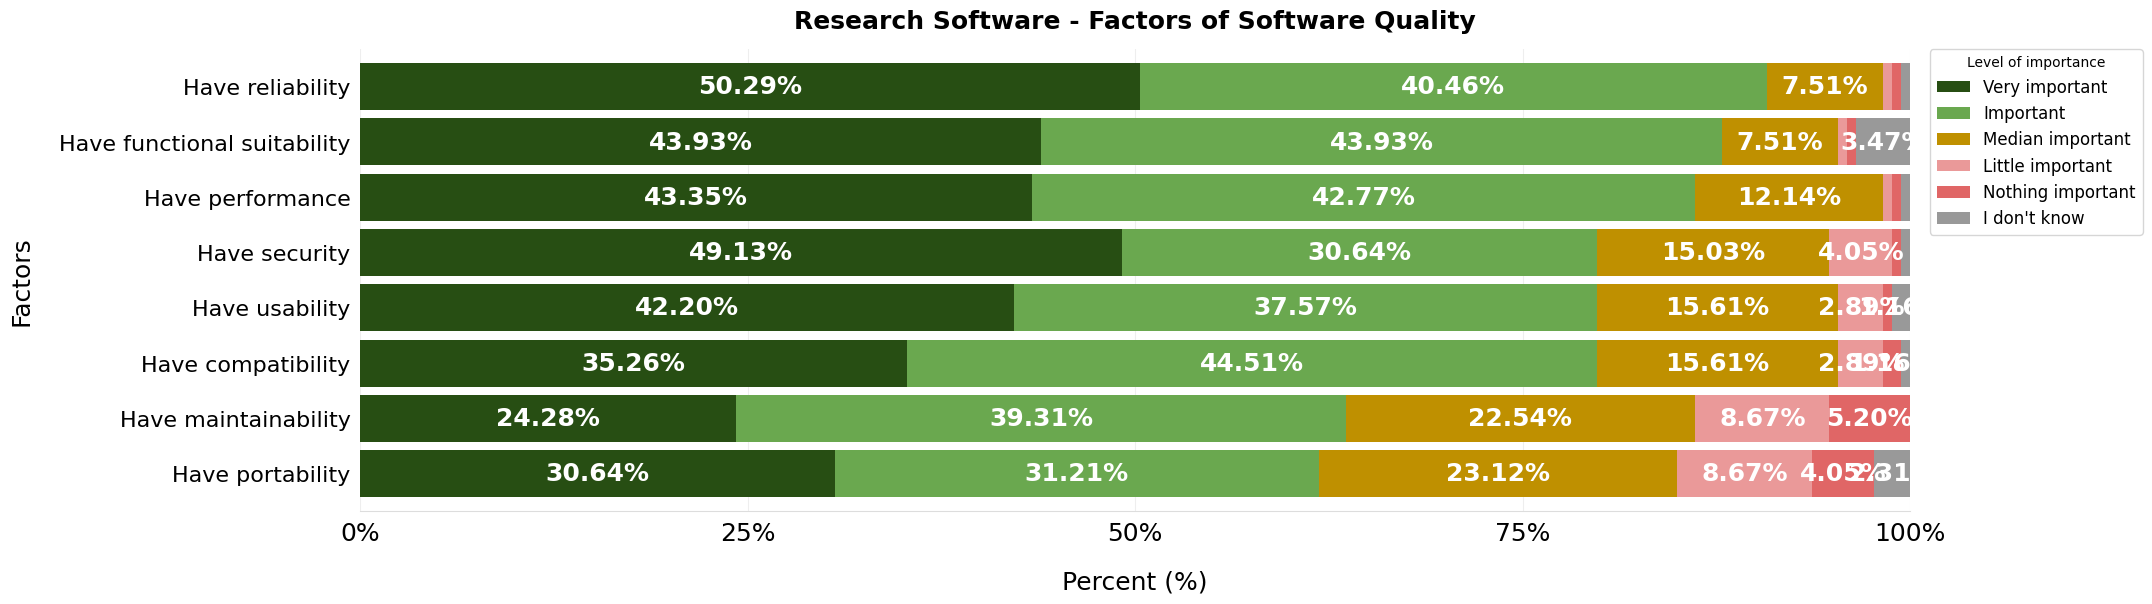

In [29]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot stacked horizontal bar chart
#df3_grafico.plot.barh(stacked=True, title="RS", xlabel ="Frequency", ylabel ="Factors" )
#plt.show()

#plotdata = df3_grafico
plotdata = df7
plotdata.head()


# Define a dictionary mapping variable values to colours:
colours = {"Very important": "#274E13", "Important": "#6AA84F", "Median important": "#BF9000", "Little important": "#EA9999", "Nothing important": "#E06666", "I don\'t know": "#999999"}

plt.rcParams["figure.figsize"] = (20, 6)
#plt.figure(figsize=(10,4))
#ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours).legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.25, 1))

ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours, width=0.85, fontsize=16)



## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=18
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2


    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if width > 1:
      label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
      if height > 0:
         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize, color='white', weight='bold')
    # plot only when width is greater than specified value <= 2
    #else:
     # if width >= 0:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #   ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
     # else:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #   ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)


# comentado

    # The width of the bar is the data value and can be used as the label
 #   label_text = ""
    # plot only when width is greater than specified value
 #   if width > 2:
 #     label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
 #     if height > 0:
 #        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)
    # plot only when width is greater than specified value <= 2
 #   else:
 #     if width >= 1:
 #       label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
 #       ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
 #     else:
#        label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
#        ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)


    # plot only when height is greater than specified value
#    if height > 0:
#        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)




ax.legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.15, 1), fontsize=12)

#for rowNum,row in ax.iterrows():
#    xpos = 0
#    for val in row:
#        xpos += val
#        ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#    xpos = 0

#for c in ax.containers:

    # customize the label to account for cases when there might not be a bar section
#    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c ]
        # set the bar label
#    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')

# add labels
#plt.xlabel("Percent (%)", labelpad=14, fontsize=12)
#plt.ylabel("Factors", labelpad=14, fontsize=12)


#ax = ax.sort_values(by=['Very important', 'Important'], ascending=False)



# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')


ax.set_xlim(0, 100)
ticks = ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(("0%", "25%", "50%", "75%", "100%"), fontsize=18)

# add labels
ax.set_title("Research Software - Factors of Software Quality", pad=15, fontsize=18, weight='bold')
ax.set_ylabel("Factors", labelpad=18, fontsize=18)
ax.set_xlabel("Percent (%)", labelpad=18, fontsize=18)
#plt.show()

plt.gca().invert_yaxis()

print ('\n \033[1m Horizontal Bar Chart - Research Software - Factors of Software Quality - Ordered by Combined Very Important and Important Ratings \033[0m')


fig.savefig('my_figure.png')